
Covariance Matrix: [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]

Eigenvalue: [2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvector: [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Sorted Eigenvalue:
[2.93808505 0.9201649  0.14774182 0.02085386]

Sorted Eigenvector: [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Explained Variance Ratio for each component: [0.72962445 0.22850762 0.03668922 0.00517871]

Cumulative Explained Variance: [0.72962445 0.95813207 0.99482129 1.        ]

Number of components to retain 95%

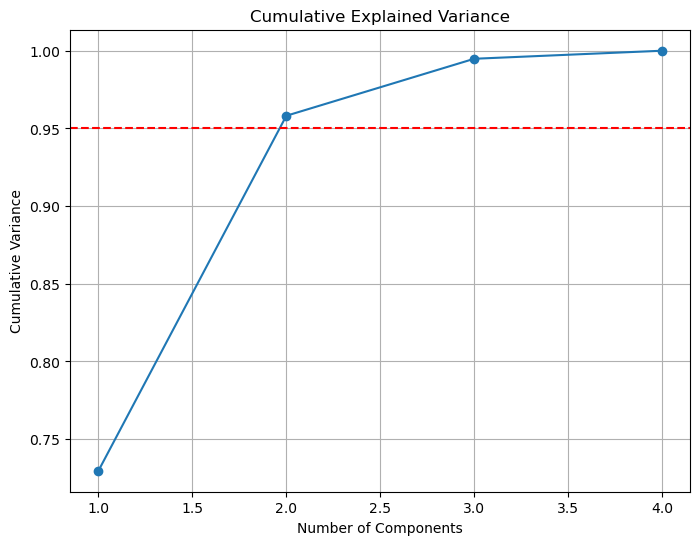

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cov_matrix = np.cov(X_scaled.T)

print("\nCovariance Matrix:",cov_matrix)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("\nEigenvalue:",eigenvalues)
print("\nEigenvector:",eigenvectors)

sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_idx]
eigenvectors_sorted = eigenvectors[:, sorted_idx]

print("\nSorted Eigenvalue:")
print(eigenvalues_sorted)
print("\nSorted Eigenvector:",eigenvectors_sorted)

explained_variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted)
print("\nExplained Variance Ratio for each component:",explained_variance_ratio)

cumulative_variance = np.cumsum(explained_variance_ratio)
print("\nCumulative Explained Variance:",cumulative_variance)

n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components to retain 95% variance: {n_components}")

principal_components = X_scaled.dot(eigenvectors_sorted[:, :n_components])

print(f"\nPrincipal Components (first 5 rows using {n_components} components):")
print(principal_components[:5])

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()
